
# <font color= blue> Lead Score Assignment </font>

**Problem statement:** X Education gets a lot of leads, its lead conversion rate is very poor. For example, if they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

**Objective:** Build a logistic regression model to assign a lead score between 0 and 100 to each lead which can be useful for company to target potential leads

In [1]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing packages for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#suppress warning
import warnings
warnings.filterwarnings('ignore')

# For better output display
pd.set_option('display.max_columns',50)
sns.set_context('notebook')

## Step1: Data Reading and initial data inspection

Here,
- task 1.1: We read the 'Leads' dataset
- task 1.2: Perform quick inspection about the source dataframe

**Task 1.1: Reading the 'Leads' dataset**

In [2]:
leads_df = pd.read_csv("Leads.csv")

In [3]:
leads_df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [4]:
leads_df.shape

(9240, 37)

**Task 1.2: Inspecting the dataframe**

In [5]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Many variables have missing values.Based on the percentage of the missing values and the significance of the variable, these NULL values can be treated

In [6]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
round(leads_df.isna().mean()*100,4)

Prospect ID                                       0.0000
Lead Number                                       0.0000
Lead Origin                                       0.0000
Lead Source                                       0.3896
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
TotalVisits                                       1.4827
Total Time Spent on Website                       0.0000
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Country                                          26.6342
Specialization                                   15.5628
How did you hear about X Education               23.8853
What is your current occupation                  29.1126
What matters most to you in choosing a course    29.3182
Search                                            0.0000
Magazine                       

**Observation:** 
- Columns that has null value percentage greater than 30% can be drooped

## Step 2: Data Cleaning

Here, the data is cleaned from missing values and incorrect data types(if any)

In [8]:
for col in leads_df.columns:
    print(col+":")
    print(leads_df[col].unique())
    print("----------------------------------------\n")

Prospect ID:
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
----------------------------------------

Lead Number:
[660737 660728 660727 ... 579545 579538 579533]
----------------------------------------

Lead Origin:
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
----------------------------------------

Lead Source:
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
----------------------------------------

Do Not Email:
['No' 'Yes']
----------------------------------------

Do Not Call:
['No' 'Yes']
---------------------

**Observation:** The variables 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque' have same value for all the records, hence these variables can be dropped as well

In [9]:
#Dropping off columns that have null percentage greater than 30 and other columns that have no contribution for modelling
leads_df.drop(['Prospect ID','Lead Number','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index',
               'Asymmetrique Activity Score','Asymmetrique Profile Score','Magazine','Receive More Updates About Our Courses',
               'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],
                axis =1 , inplace = True)

In [10]:
#Checking the value counts of the categorical variabels

for col in leads_df.columns:
    print(col+":")
    print(leads_df[col].value_counts())
    print("----------------------------------------\n")

Lead Origin:
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------

Lead Source:
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
youtubechannel          1
Pay per Click Ads       1
testone                 1
WeLearn                 1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64
----------------------------------------

Do Not Email:
No     8506
Yes     734
Name: Do Not Email, dtype: int64
----------------------------------------

Do Not 

**Observation:**
- The variable 'Do Not Call' have very biased values, and since it cannot contribute much to the modelling, it can be dropped
- The variable 'Specialization' has many records with value as 'Select' which is similar to NULL. But since this is a predominant variable, it cannot be dropped. Hence the missing records can be dropped or imputed.
- The variable 'How did you hear about X Education' have significantly high values with 'Select' and dropping all those records can shrink the data size. Hence this column can be dropped
- The values in the variable 'What matters most to you in choosing a course' have value 'Better Career Prospects' for all most all the records, hence this variable doesnot contribute much to analaysis and it can be dropped as well
- Similarly, the variables 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations' have an fully unbiased values, hence these variables can be dropped as well
- The variable 'Lead Profile' has 4146 records with 'Select' which is approximately 63% of NULL values. Moreover, this variable has already 29% of missing values. Because of such a high number of NULL values, this variable cannot contribute much to the modelling. Hence, this variable can be dropped
- The variable 'City' has almost 2249 records which is almost with value 'Select'. Since city is a predominant variable, the missing records can be dropped

In [11]:
leads_df.loc[leads_df["Specialization"] == "Select","Specialization"] = np.nan
leads_df.loc[leads_df["City"] == "Select","City"] = np.nan

In [12]:
# Dropping off unncessary variables from above observations

leads_df.drop(['Do Not Call','How did you hear about X Education','What matters most to you in choosing a course','Search',
               'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
               'Lead Profile'],axis = 1, inplace = True)

In [13]:
# Rechecking the NULL values percentage again
round(leads_df.isna().mean()*100,4)

Lead Origin                                0.0000
Lead Source                                0.3896
Do Not Email                               0.0000
Converted                                  0.0000
TotalVisits                                1.4827
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4827
Last Activity                              1.1147
Country                                   26.6342
Specialization                            36.5801
What is your current occupation           29.1126
City                                      39.7078
A free copy of Mastering The Interview     0.0000
Last Notable Activity                      0.0000
dtype: float64

**Observation**
- Though the variables 'Specialization','Country','What is your current occupation' have significant NULL values, these variabels have a higher business interpretation and cannot be dropped. Moreover, imputing such higher values may bring imbalance in data. Hence, the NULL rows alone can be dropped
- Despite higher NULL value percentage, The values in the variable 'City' have no much business interpretation. Hence this variable can be dropped


In [14]:
# Dropping the column 'City' based on above observation
leads_df.drop(["City"],axis = 1,inplace = True)

In [15]:
# Dropping of NULL records from columns based on above observations
leads_df.dropna(subset = ["Lead Source","TotalVisits","Page Views Per Visit","Last Activity","Specialization","What is your current occupation","Country"],axis=0, inplace = True)

In [16]:
# Re-verifiying the NULL values percentage
round(leads_df.isna().mean()*100,4)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [17]:
# Re-inspecting the dataframe
leads_df.shape

(4020, 13)

In [18]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4020.000000,4020.000000,4020.000000,4020.000000
mean,0.466418,4.795274,695.941542,3.279915
std,0.498933,5.568379,555.864132,2.006294
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,199.000000,2.000000
50%,0.000000,4.000000,504.000000,3.000000
75%,1.000000,6.000000,1174.000000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


In [19]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4020 entries, 2 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             4020 non-null   object 
 1   Lead Source                             4020 non-null   object 
 2   Do Not Email                            4020 non-null   object 
 3   Converted                               4020 non-null   int64  
 4   TotalVisits                             4020 non-null   float64
 5   Total Time Spent on Website             4020 non-null   int64  
 6   Page Views Per Visit                    4020 non-null   float64
 7   Last Activity                           4020 non-null   object 
 8   Country                                 4020 non-null   object 
 9   Specialization                          4020 non-null   object 
 10  What is your current occupation         4020 non-null   obje

**Observation:** Now the data is clean and usable for Univariate and bivariate analysis

## Step 3: Univariate analysis
Here, the univariate analysis of continuous and categorical variables is performed

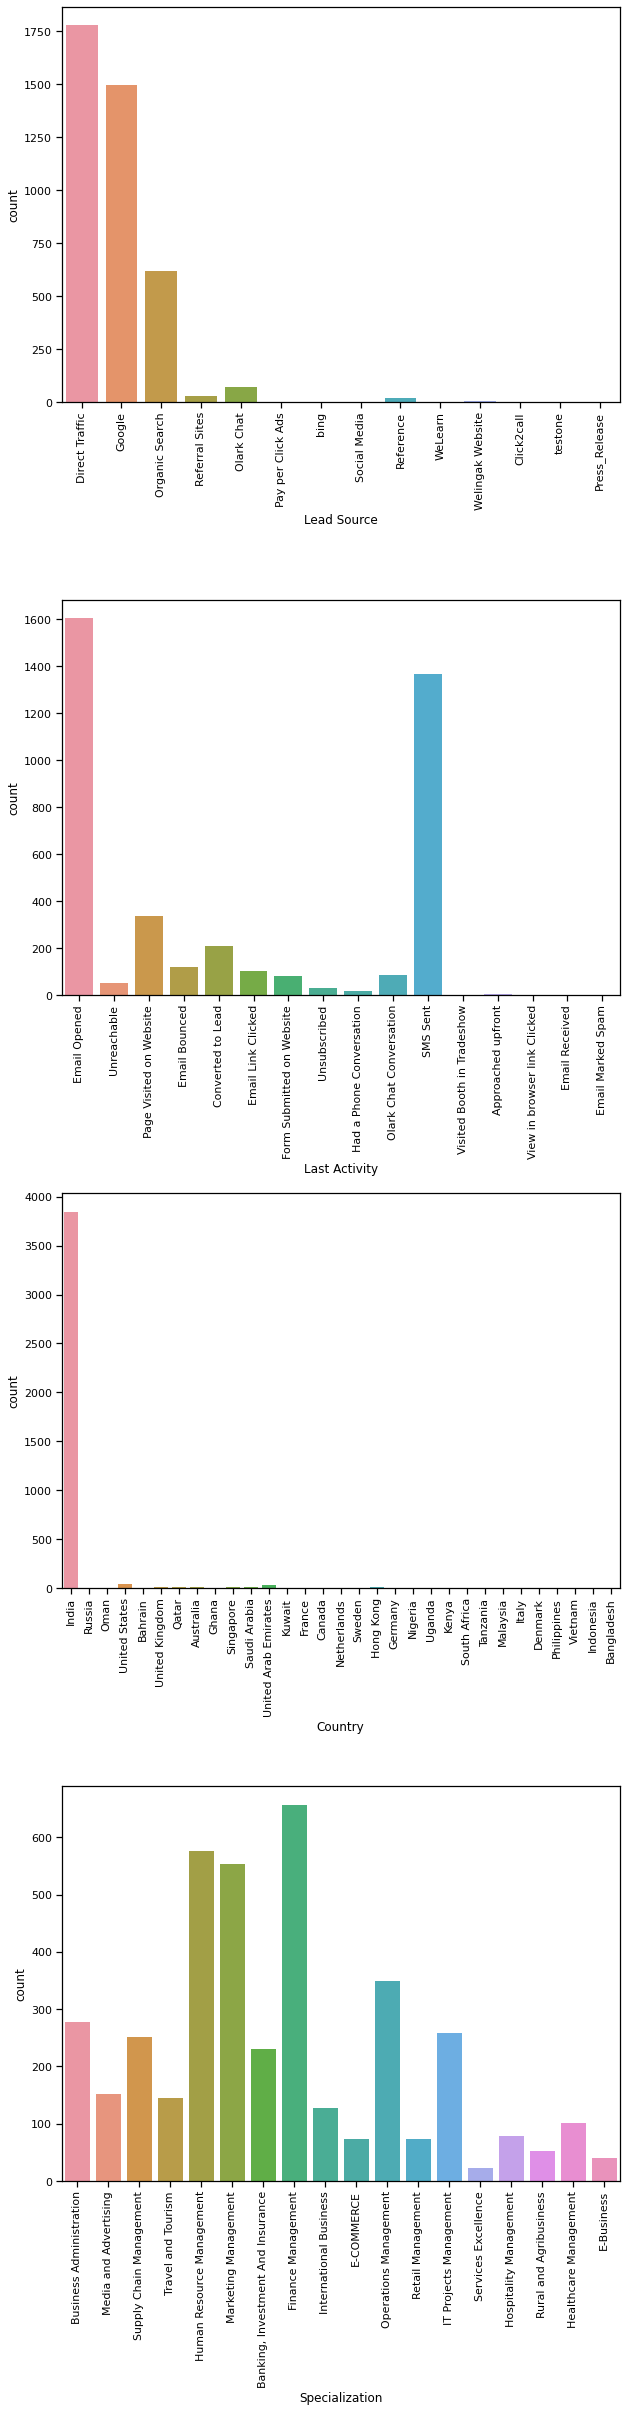

In [20]:
# Analysing categorical variables

f,ax = plt.subplots(4,figsize = [10,40])
plt.subplots_adjust(hspace = 0.5,wspace= 0.3)

sns.countplot(leads_df["Lead Source"],ax = ax[0])
ax[0].tick_params('x',labelrotation = 90)

sns.countplot(leads_df["Last Activity"],ax = ax[1])
ax[1].tick_params('x',labelrotation=90)

sns.countplot(leads_df["Country"],ax = ax[2])
ax[2].tick_params('x',labelrotation=90)

sns.countplot(leads_df["Specialization"],ax = ax[3])
ax[3].tick_params('x',labelrotation = 90)

plt.show()

**Observation:**
- In Lead source, the number of users from 'Direct Traffic' is high followed by 'Google' and 'Organic Search'
- Similarly, the last activity of the customers are more towards 'Email Openened' followed by 'SMS sent'
- Most of the leads are from India
- Most of the leads are from the specialization 'Finance Managenemt' followed by 'Human Resource Management' and 'Marketing Management'. Whereas leads form 'Services excellence' and 'Rural and Agribusiness' are least of all

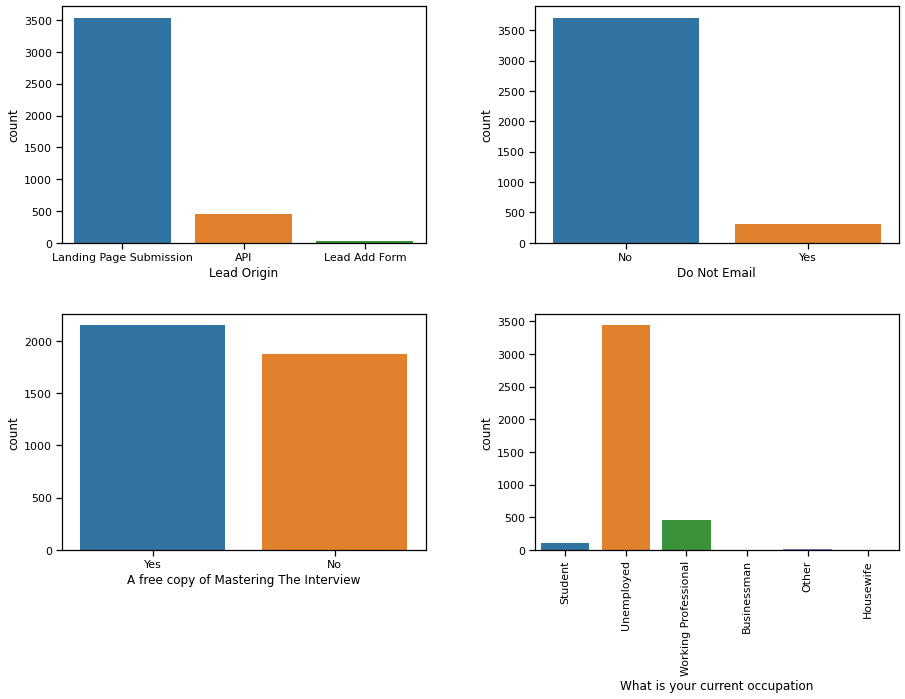

In [21]:
f,ax = plt.subplots(2,2,figsize = [15,10])
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
sns.countplot(leads_df["Lead Origin"],ax = ax[0][0])
sns.countplot(leads_df["Do Not Email"],ax = ax[0][1])
sns.countplot(leads_df["A free copy of Mastering The Interview"],ax = ax[1][0])
sns.countplot(leads_df["What is your current occupation"],ax = ax[1][1])
ax[1][1].tick_params('x',labelrotation=90)
plt.show()

**Observation**
- The Lead origins were identified majorly from 'Landing Page Submission'
- Majority of leads agreed to receive emails
- Most of the leads were 'unemployed'

In [22]:
leads_df.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,Modified


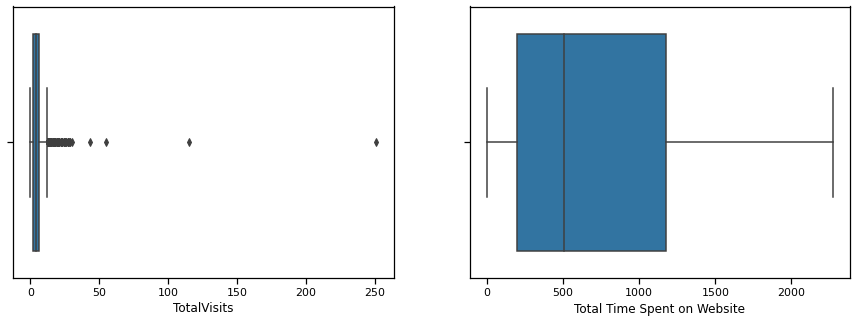

In [23]:
# Analysis of continuous variables

f,ax = plt.subplots(1,2,figsize=[15,5])

sns.boxplot(leads_df['TotalVisits'],ax= ax[0])
sns.boxplot(leads_df['Total Time Spent on Website'],ax=ax[1])
plt.show()

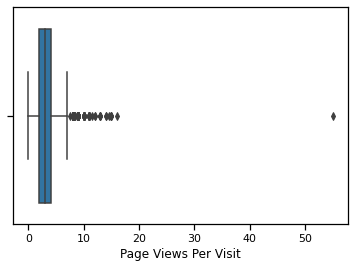

In [24]:
sns.boxplot(leads_df["Page Views Per Visit"])
plt.show()

**Observaition:** There are outliers oberserved in 'TotalVisits' and 'Page Views Per Visit'. These outliers are treated by capping all the numerical values above 95 percentile to reduce the skewness in data

In [25]:
# Capping the outliers to 95 percentile
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for col in num_cols:
    q4 = leads_df[col].quantile(0.95)
    leads_df[col][leads_df[col]>=q4] = q4

## Step 4: Bivariate analysis

Here, To find the correalation of the conitunous variables against the target variable

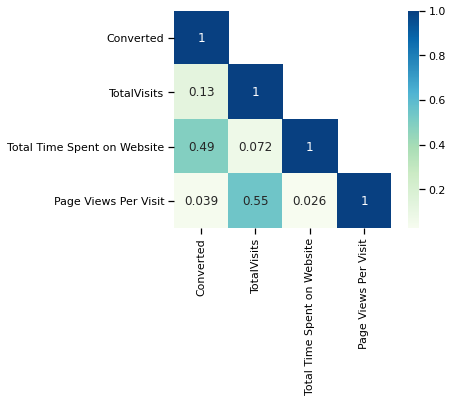

In [26]:
# Analysing the correlation of continuous variables

correlation = leads_df.corr()
corr_mask = np.array(correlation)
corr_mask[np.tril_indices_from(corr_mask)] = False
sns.heatmap(correlation,mask = corr_mask,square = True,annot = True,cmap='GnBu')

plt.show()

**Observation:**
- There is a good positive correlation of the variable 'Total Time Spent on Website' with respect to the target variable
- Similarly, there is a good positive correlation between the variables 'Page Views Per Visit' and 'TotalVisits'

## Step 5: Data Preperation 

Here, we prepare the data suitable for logistic modelling
- Creating dummy variables
- Test-train split
- Scaling

In [27]:
# Creating the dummy variables and merging it to the main dataframe
dummies = pd.get_dummies(leads_df[["Lead Origin","Lead Source","Last Activity","Country","Specialization",
                                               "What is your current occupation","Last Notable Activity"]], drop_first = True)

# Dropping the main columns after extracting the dummy variables
leads_df.drop(["Lead Origin","Lead Source","Last Activity","Country","Specialization",
                "What is your current occupation","Last Notable Activity"],axis = 1, inplace = True)

#Mering the dummy variables to the main dataframe
leads_df = pd.concat([leads_df,dummies],axis = 1)

In [28]:
# Changing the Yes and No to 1 and 0 for better modelling
leads_df["Do Not Email"] = leads_df["Do Not Email"].map({"No":0, "Yes":1})
leads_df["A free copy of Mastering The Interview"] = leads_df["A free copy of Mastering The Interview"].map({"No":0,"Yes":1})

In [29]:
# Verifying the above changes
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,0,1,2.0,1532.0,2.00,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305.0,1.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,1,2.0,1640.0,2.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,0,1,8.0,1351.0,7.00,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11,0,1,8.0,1343.0,2.67,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [30]:
# Checking the size of data frame after mergin the dummy variables
leads_df.shape

(4020, 101)

In [31]:
# Train-test split
leads_train,leads_test = train_test_split(leads_df,train_size =0.7,test_size = 0.3, random_state = 100)

In [32]:
# Scaling the continuous variables
scaler = StandardScaler()
leads_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(leads_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
leads_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(leads_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [33]:
leads_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8432,0,1,-0.949078,1.773622,-0.764610,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2926,0,1,-0.204527,1.523157,0.498789,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9191,0,0,-0.204527,-0.755485,-1.187848,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9086,0,0,-0.576802,-0.944446,-0.132910,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8487,0,0,-0.949078,-0.638774,-0.764610,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [34]:
leads_test.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3193,0,1,2.029126,-0.877754,-1.238384,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7620,0,1,-0.204527,-0.894427,0.498789,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7376,0,0,-0.949078,-0.466487,-0.764610,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5425,0,1,-0.576802,-1.012990,-0.132910,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1498,0,0,1.656851,-0.512801,0.814638,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Step 6: Data modelling

Here,
- first we filterout the variables using RFE method and build an initial model with it
- Then, we fine-tune the model by dropping out the insignificant and multicollinear predictors by analysing the statistics report of the model

In [35]:
# Splitting the data into x and y

y_train = leads_train.pop("Converted")
X_train = leads_train

##### RFE(Recursive Feature Elemination) method

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [37]:
# checking the ranking of the columns
sorted(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), key = lambda x: x[2])

[('Do Not Email', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_Italy', True, 1),
 ('Country_Qatar', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Last Notable Activity_Unreachable', True, 1),
 ('Last Notable Activity_Unsubscribed', True, 1),
 ('Country_France', False, 2),
 ('Country_Singapore', False, 3),
 ('Country_Kuwait', False, 4),
 ('Last Notable Activity_Modified', False, 5),
 ('Last Notable Activity_Email Opened', False, 6),
 ('Last Activity_Email Opened', False, 7),
 ('What is your current occupation_Unemployed', False, 8),
 ('What is your current oc

In [38]:
# Considered columns from the RFE method
considered_cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[considered_cols]

In [39]:
#Creating a user defined function for calcluating VIF metric

def vif_result(df):
    vif = pd.DataFrame()
    vif["features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1]) ]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by="VIF",ascending = False)
    return vif

#### Running first model logm1

In [40]:
X_train_sm = sm.add_constant(X_train_rfe[considered_cols])
logm1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
model1 = logm1.fit()
print(model1.summary())
vif_result(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2814
Model:                            GLM   Df Residuals:                     2798
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1292.0
Date:                Wed, 08 Sep 2021   Deviance:                       2584.1
Time:                        16:04:22   Pearson chi2:                 2.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,features,VIF
4,Lead Source_Reference,4.26
3,Lead Origin_Lead Add Form,4.25
6,Last Activity_Had a Phone Conversation,2.61
12,Last Notable Activity_Had a Phone Conversation,2.60
2,Lead Origin_Landing Page Submission,1.65
7,Last Activity_SMS Sent,1.54
0,Do Not Email,1.17
11,What is your current occupation_Working Profes...,1.16
14,Last Notable Activity_Unsubscribed,1.08
1,Total Time Spent on Website,1.07


**Observation:** There are few variables which are insignificant (p-value > 0.05), However, no variables are having strong correlation (VIF>5). Thus, these insignificant variables can be dropped and the model can be build again.

#### Running second model logm2

In [41]:
# Dropping two insignificant variables that has less business interpretation of all the significant variable
X_train_rfe.drop(["Lead Origin_Lead Add Form","Country_Italy"],axis = 1, inplace = True)

In [42]:
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
model2 = logm2.fit()
print(model2.summary())
vif_result(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2814
Model:                            GLM   Df Residuals:                     2800
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1296.4
Date:                Wed, 08 Sep 2021   Deviance:                       2592.8
Time:                        16:04:22   Pearson chi2:                 2.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,features,VIF
5,Last Activity_Had a Phone Conversation,2.61
10,Last Notable Activity_Had a Phone Conversation,2.60
2,Lead Origin_Landing Page Submission,1.65
6,Last Activity_SMS Sent,1.54
0,Do Not Email,1.17
9,What is your current occupation_Working Profes...,1.16
12,Last Notable Activity_Unsubscribed,1.08
1,Total Time Spent on Website,1.07
4,Lead Source_Referral Sites,1.02
3,Lead Source_Reference,1.01


Still few variables are highly insignificant, these can be dropped as well

#### Running third model logm3

In [43]:
X_train_rfe.drop(["What is your current occupation_Housewife","Last Notable Activity_Had a Phone Conversation"],axis=1,inplace = True)

In [44]:
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model3 = logm3.fit()
print(model3.summary())
vif_result(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2814
Model:                            GLM   Df Residuals:                     2802
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1301.8
Date:                Wed, 08 Sep 2021   Deviance:                       2603.6
Time:                        16:04:23   Pearson chi2:                 2.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,features,VIF
2,Lead Origin_Landing Page Submission,1.64
6,Last Activity_SMS Sent,1.54
0,Do Not Email,1.17
8,What is your current occupation_Working Profes...,1.16
10,Last Notable Activity_Unsubscribed,1.08
1,Total Time Spent on Website,1.07
4,Lead Source_Referral Sites,1.02
3,Lead Source_Reference,1.01
9,Last Notable Activity_Unreachable,1.01
5,Last Activity_Had a Phone Conversation,1.00


The variables 'Lead Source_Reference', 'Country_Qatar' are still highly insignificant. These variables can be dropped as well

#### Running fourth model logm4

In [45]:
X_train_rfe.drop(["Lead Source_Reference","Country_Qatar"],axis=1,inplace = True)

In [46]:
X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model4 = logm4.fit()
print(model4.summary())
vif_result(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2814
Model:                            GLM   Df Residuals:                     2804
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1309.6
Date:                Wed, 08 Sep 2021   Deviance:                       2619.1
Time:                        16:04:23   Pearson chi2:                 2.86e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,features,VIF
2,Lead Origin_Landing Page Submission,1.64
5,Last Activity_SMS Sent,1.54
0,Do Not Email,1.17
6,What is your current occupation_Working Profes...,1.15
8,Last Notable Activity_Unsubscribed,1.08
1,Total Time Spent on Website,1.07
3,Lead Source_Referral Sites,1.01
7,Last Notable Activity_Unreachable,1.01
4,Last Activity_Had a Phone Conversation,1.00


**Observation:** It is observed that variables 'Last Notable Activity_Unreachable' and 'Last Notable Activity_Unsubscribed' have positive coefficeints which has no business semantics. This could be due to poor data quality or minor mistakes in the modeling. Hence, these variables can be dropped.

#### Running fifth model logm5

In [47]:
X_train_rfe.drop(["Last Notable Activity_Unreachable","Last Notable Activity_Unsubscribed"],axis=1,inplace = True)

In [48]:
X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model5 = logm5.fit()
print(model5.summary())
vif_result(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2814
Model:                            GLM   Df Residuals:                     2806
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1316.3
Date:                Wed, 08 Sep 2021   Deviance:                       2632.7
Time:                        16:04:23   Pearson chi2:                 2.89e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,features,VIF
2,Lead Origin_Landing Page Submission,1.64
5,Last Activity_SMS Sent,1.53
6,What is your current occupation_Working Profes...,1.15
0,Do Not Email,1.09
1,Total Time Spent on Website,1.07
3,Lead Source_Referral Sites,1.01
4,Last Activity_Had a Phone Conversation,1.00


Now all the variables are significant (p <0.05) and there is no multi-collinearity observed. Hence, it can be considered as final model

#### Checking the accuracy of the model with an arbitrary threshold value

In [49]:
#Checking the accuracy of the final model
y_train_pred = model5.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.78223986, 0.87726225, 0.17251168, 0.30773856, 0.19207811,
       0.56490005, 0.20671934, 0.937641  , 0.90453604, 0.18100626])

In [50]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})

In [51]:
y_train_pred_final.head()

,Converted,Converted_prob
0,1,0.782240
1,1,0.877262
2,0,0.172512
3,0,0.307739
4,0,0.192078


In [52]:
# Checking the accuracy of the model witht the initial threshold value set to 0.5
y_train_pred_final["Converted_predicted"] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Converted_predicted
0,1,0.782240,1
1,1,0.877262,1
2,0,0.172512,0
3,0,0.307739,0
4,0,0.192078,0


In [53]:
# Creating the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Converted_predicted)
confusion

array([[1236,  249],
       [ 348,  981]], dtype=int64)

In [54]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Converted_predicted))

0.7878464818763327


#### Metrics beyond accuracy

In [55]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True negative
FP = confusion[0,1] # False positive
FN = confusion[1,0] # False negative

In [56]:
# Sensitivity of the model
TP/float(TP+FN)

0.7381489841986456

In [57]:
# Specificity
TN/float(TN+FP)

0.8323232323232324

In [58]:
# calculating the false positive rate
FP/float(TN+FP)

0.16767676767676767

In [59]:
# Positive predictive values
TP/float(TP+FP) 

0.7975609756097561

In [60]:
# Negative predictive values
TN/float(TN+FN)

0.7803030303030303

It is predominat that the number of potential leads who can be converted need to be predicted more accurately. Thus, a balance between sensitivity and specificity is necessary while considering the optimal threshold value

## Step 7: Analyisng the goodness of model using ROC

Here,
THe optimal threshold value to classify the probability is perfomed using the ROC curve concept

In [61]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

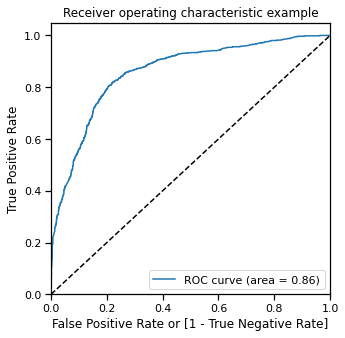

In [62]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

**Observation:** The Area under the curve(AUC) for the ROC graph is good and hence, the model can be considered an optimal model 

## Step 8: Finding the optimal cutoff point

Optimal cutoff point is where we get a decently higher sensitivity and specificity

In [63]:
# Predicting the probabilities on different cutoff values
cutoff_vals = [float(i)/10 for i in range(10) ]

for val in cutoff_vals:
    y_train_pred_final[val] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x >val else 0)

In [64]:
y_train_pred_final.head()

,Converted,Converted_prob,Converted_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.782240,1,1,1,1,1,1,1,1,1,0,0
1,1,0.877262,1,1,1,1,1,1,1,1,1,1,0
2,0,0.172512,0,1,1,0,0,0,0,0,0,0,0
3,0,0.307739,0,1,1,1,1,0,0,0,0,0,0
4,0,0.192078,0,1,1,0,0,0,0,0,0,0,0


In [65]:
# calculating accuracy, sensitivity and specificity for each cutoff probabilities

cutoff_df = pd.DataFrame(columns= ["cutoff","accuracy","sensitivity","specificity"])

for val in cutoff_vals:
    c_matrix = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[val])
    total = sum(sum(c_matrix))
    
    accuracy = (c_matrix[0,0]+c_matrix[1,1])/total
    sensitivity = c_matrix[1,1]/(c_matrix[1,0]+c_matrix[1,1])
    specificity = c_matrix[0,0]/(c_matrix[0,0]+c_matrix[0,1])
    cutoff_df.loc[val] = [val,accuracy,sensitivity,specificity]

In [66]:
print(cutoff_df)

     cutoff  accuracy  sensitivity  specificity
0.0     0.0  0.472281     1.000000     0.000000
0.1     0.1  0.517413     0.998495     0.086869
0.2     0.2  0.711443     0.932280     0.513805
0.3     0.3  0.766169     0.878856     0.665320
0.4     0.4  0.797797     0.817908     0.779798
0.5     0.5  0.787846     0.738149     0.832323
0.6     0.6  0.765814     0.653875     0.865993
0.7     0.7  0.737029     0.550038     0.904377
0.8     0.8  0.694030     0.404063     0.953535
0.9     0.9  0.641080     0.255079     0.986532


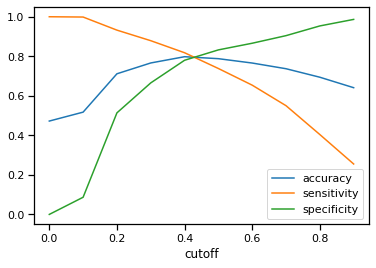

In [67]:
# plotting the accuracy,sensitivity and specificity of the considered cutoff values
cutoff_df.plot.line(x = "cutoff", y = ["accuracy","sensitivity","specificity"] )
plt.show()

**Observation:** It is apparent from the above plot that the optimum balanced cutoff can be 0.4

In [68]:
# classifying the probabilities based on the identified optimal cutoff around'0.4'
y_train_pred_final["final_predicted"] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.42 else 0)

In [69]:
y_train_pred_final.head()

,Converted,Converted_prob,Converted_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.782240,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.877262,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.172512,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.307739,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.192078,0,1,1,0,0,0,0,0,0,0,0,0


In [70]:
# Checking the accuracy of the optimal threshold
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.7981520966595593

In [71]:
# Checking the confusion matrix for the final model
confusion_final = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

TN = confusion_final[0,0] # True Negative
FP = confusion_final[0,1] # False Positive
FN = confusion_final[1,0] # False Negative
TP = confusion_final[1,1] # True Positive

In [72]:
# Sensitivity of the final predictions
TP/float(TP+FN)

0.8051166290443943

In [73]:
# Specificity of the final predictions
TN/float(TN+FP)

0.7919191919191919

In [74]:
# False positive rate 
FP/float(TN+FP)

0.2080808080808081

In [75]:
# Positive predicitve values also known
TP/float(TP+FP)

0.7759245830311821

In [76]:
# Negative predictive values
TN/float(TN+FN)

0.8195121951219512

### Precision and recall Perspective to analyse optimal cutoff

In [77]:
precision_score(y_train_pred_final.Converted,y_train_pred_final.Converted_predicted)

0.7975609756097561

In [78]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.Converted_predicted)

0.7381489841986456

In [79]:
precision,recall,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

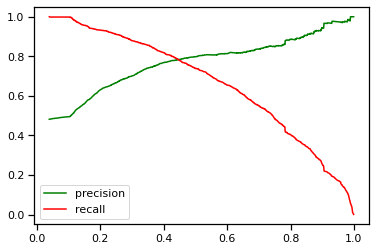

In [80]:
plt.plot(thresholds,precision[:-1],"-g",label="precision")
plt.plot(thresholds,recall[:-1],"-r",label="recall")
plt.legend()
plt.show()

**Observation:** From the plot of precision_recall curve, the optimal value to have a balance between the precision and recall is 0.4 which is the same threshold value identified from the ROC curve. Thus, considering 0.4 as final threshold for further steps

In [81]:
# Precision on final cutoff
precision_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.7759245830311821

In [82]:
# Recall on final cutoff of train data
recall_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.8051166290443943

## Step 9: Making predicitons on test data

In [83]:
# Splitting the test data into x and y

X_test = leads_test[X_train_rfe.columns]
y_test = leads_test.pop("Converted")

X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Referral Sites,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional
3193,0,-0.877754,1,0,0,0,0
7620,0,-0.894427,1,0,0,0,0
7376,0,-0.466487,1,0,0,0,0
5425,0,-1.012990,1,0,0,1,1
1498,0,-0.512801,0,0,0,0,0


In [84]:
# Predicting the y_test 

X_test_sm = sm.add_constant(X_test)
y_test_pred_prob = model5.predict(X_test_sm)

In [85]:
y_test_df = pd.DataFrame(columns = ["Converted","Probability","Predicted"])
y_test_df["Converted"] = y_test
y_test_df["Probability"] = y_test_pred_prob
y_test_df["Predicted"] = y_test_df["Probability"].map(lambda x: 1 if x>0.42 else 0)

#### Evaluating the model on test data

In [86]:
# Accuracy of the model on the test data

metrics.accuracy_score(y_test_df.Converted,y_test_df.Predicted)

0.7728026533996684

In [87]:
confusion_test = metrics.confusion_matrix(y_test_df.Converted,y_test_df.Predicted)
confusion_test

array([[512, 148],
       [126, 420]], dtype=int64)

In [88]:
TN = confusion_test[0,0] # True Negative
FP = confusion_test[0,1] # False Positive
FN = confusion_test[1,0] # False Negative
TP = confusion_test[1,1] # True Positive

In [89]:
# Sensitivity of model on the test data
TP/float(TP+FN)

0.7692307692307693

In [90]:
# Specificity of the final predictions
TN/float(TN+FP)

0.7757575757575758

In [91]:
# False positive rate 
FP/float(TN+FP)

0.22424242424242424

In [92]:
# Positive predicitve values also known
TP/float(TP+FP)

0.7394366197183099

In [93]:
# Negative predictive values
TN/float(TN+FN)

0.8025078369905956

In [94]:
# precision of the model on the test data
precision_score(y_test_df.Converted,y_test_df.Predicted)

0.7394366197183099

In [95]:
# Recall of the model on the test data
recall_score(y_test_df.Converted,y_test_df.Predicted)

0.7692307692307693

**Summary:**
The variables with positive coefficient indicate that there is higher chance for the leads to get converted and vice-verse. Thus the company has to considere those customers as potential leads who requests for receiving of mails, who spends more time on the website and who are working professionals. Similary, people who do not request for email receiving and leads orgin from landing page submission have very lower probability of becoming into converted group of customers